In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
path_interim = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/interim/'
path_processed = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/processed/'

In [3]:
df = pd.read_excel(path_interim+'data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Tipologia                                  8714 non-null   object        
 1   Zona                                       8714 non-null   object        
 2   Stato                                      8714 non-null   object        
 3   Prezzo_EUR                                 8714 non-null   int64         
 4   Superficie_m2                              8714 non-null   int64         
 5   Prezzo_per_m2                              8714 non-null   float64       
 6   Tipo_proprietà                             8714 non-null   object        
 7   Riscaldamento_A_C                          8714 non-null   object        
 8   Tipo_riscaldamento                         8714 non-null   object        
 9   Alimentazione_risca

In [4]:
#features = ['Data_annuncio', 'Zona', 'Tipologia', 'Prezzo_EUR', 'Prezzo_per_m2' , 'Superficie_m2',
#            'Superficie_bins', 'Num_tot_locali', 'Num_bagni', 'Stato', 'Tipo_riscaldamento', 'Ascensore']

#df = df[features]

In [5]:
df.describe()

,Prezzo_EUR,Superficie_m2,Prezzo_per_m2,Ascensore,Accesso_disabili,Posti_garage,Posti_esterni,Num_bagni,Num_tot_locali,Anno_costruzione,Fibra ottica,VideoCitofono,Porta blindata,Impianto tv singolo,Parzialmente Arredato,Infissi esterni in vetro / legno,Esposizione doppia,Balcone,Impianto tv centralizzato,Infissi esterni in doppio vetro / PVC,Esposizione esterna,Terrazza,Cancello elettrico,Cantina,Giardino privato,Caminetto,Portiere intera giornata,Infissi esterni in doppio vetro / legno,Armadio a muro,Impianto di allarme,Mansarda,Infissi esterni in doppio vetro / metallo,Solo Cucina Arredata,Esposizione interna,Infissi esterni in vetro / PVC,Giardino comune,Taverna,Impianto tv con parabola satellitare,Arredato,Infissi esterni in triplo vetro / PVC,Infissi esterni in triplo vetro / legno,Infissi esterni in vetro / metallo,Portiere mezza giornata,Cablato,Idromassaggio,Reception,Piscina,Infissi esterni in triplo vetro / metallo
count,"8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00"
mean,"481,863.32",118.76,"4,158.30",0.45,0.15,0.13,0.30,1.68,4.23,"1,886.61",0.24,0.24,0.59,0.39,0.14,0.23,0.44,0.41,0.26,0.10,0.16,0.35,0.18,0.24,0.17,0.10,0.02,0.28,0.15,0.17,0.09,0.02,0.01,0.09,0.03,0.06,0.04,0.03,0.10,0.01,0.01,0.01,0.01,0.00,0.03,0.00,0.01,0.00
std,"659,474.58",180.69,"1,438.06",0.50,0.36,0.40,2.05,0.84,2.36,142.47,0.43,0.42,0.49,0.49,0.35,0.42,0.50,0.49,0.44,0.30,0.37,0.48,0.38,0.43,0.38,0.31,0.14,0.45,0.36,0.37,0.28,0.14,0.09,0.29,0.18,0.24,0.19,0.16,0.30,0.11,0.10,0.11,0.08,0.02,0.16,0.05,0.09,0.03
min,700.00,5.00,10.00,0.00,0.00,0.00,0.00,1.00,1.00,"1,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"248,000.00",65.00,"3,250.00",0.00,0.00,0.00,0.00,1.00,3.00,"1,870.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"339,000.00",90.00,"3,971.01",0.00,0.00,0.00,0.00,1.00,4.00,"1,940.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"501,000.00",129.00,"4,769.23",1.00,0.00,0.00,0.00,2.00,5.00,"1,969.00",0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"28,000,000.00","8,150.00","23,000.00",1.00,1.00,2.00,176.00,4.00,47.00,"2,020.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Exploratory Data Analysis

### 1. Continuous variables

#### Distributions

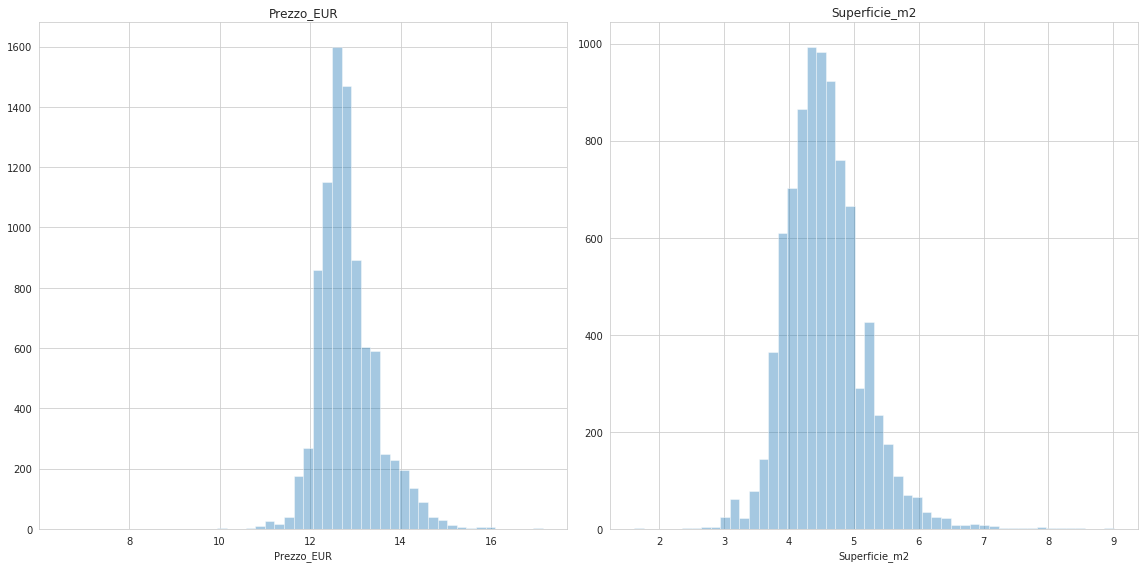

In [46]:
continuous_vars = ['Prezzo_EUR', 'Superficie_m2']

# Distributions - take log to normalize
plt.figure(figsize=(16, 8))
sns.set_style('whitegrid')
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 2, i)
    sns.distplot(np.log(df[var]), kde=False)
    plt.title(var)

plt.tight_layout()
plt.show()

We can clearly see that the log values for the price and square meters follow a normal distribution. This would mean that these variables follow an exponential distribution.

#### Boxplots

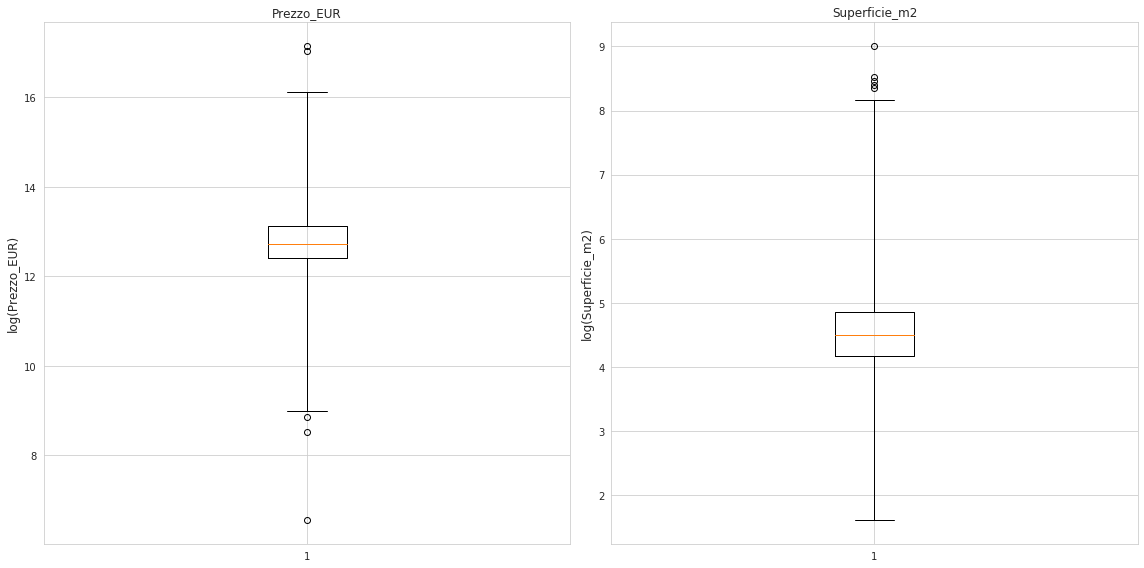

In [52]:
plt.figure(figsize=(16,8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 2, i)
    plt.boxplot(np.log(df[var]), whis=5)
    plt.ylabel("log({})".format(var), size=12)
    plt.title(var)

plt.tight_layout()
plt.show()

In [41]:
df[continuous_vars].describe()

,Prezzo_EUR,Superficie_m2
count,"8,714.00","8,714.00"
mean,"481,863.32",118.76
std,"659,474.58",180.69
min,700.00,5.00
25%,"248,000.00",65.00
50%,"339,000.00",90.00
75%,"501,000.00",129.00
max,"28,000,000.00","8,150.00"


In [ ]:
# POSSIBLY WINSORIZE VARIABLES TO REMOVE OUTLIERS?

#### Price vs. square meters

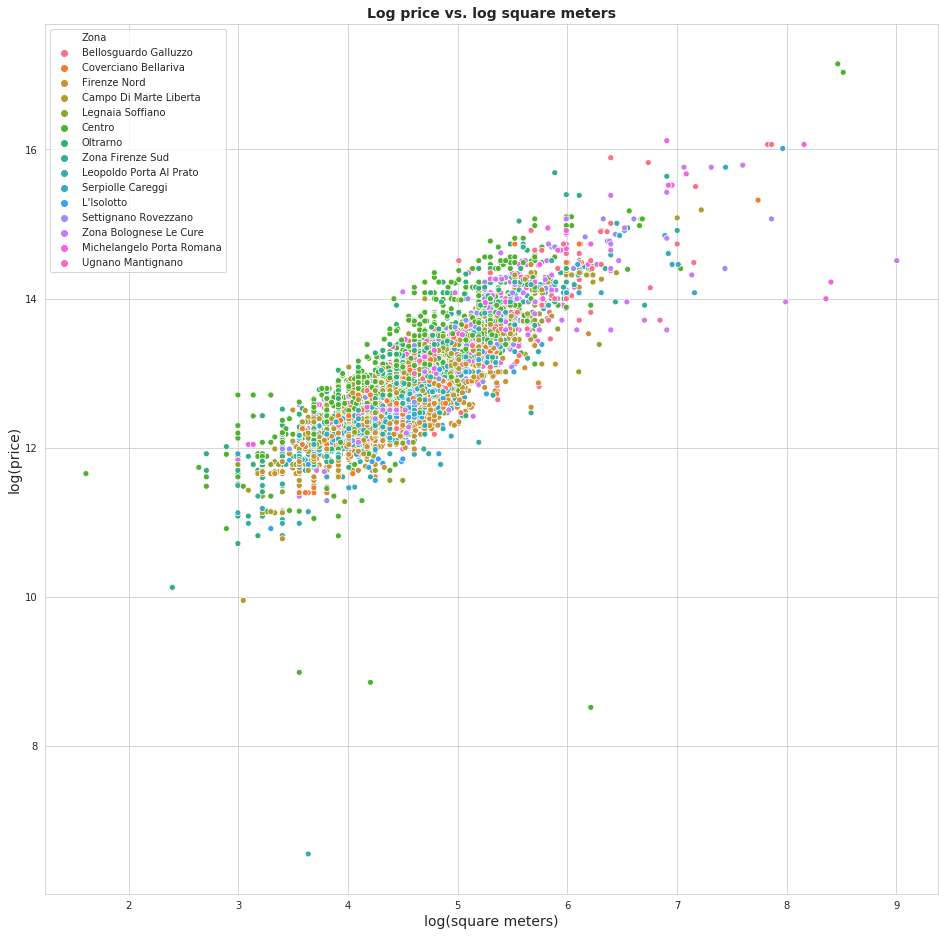

In [12]:
# Relationship between price and area - take log to normalize
fig = plt.figure(figsize=(16, 16))
sns.set_style('whitegrid')
sns.scatterplot(x=np.log(df['Superficie_m2']), y=np.log(df['Prezzo_EUR']), hue=df['Zona'])
plt.xlabel("log(square meters)", size=14)
plt.ylabel("log(price)", size=14)
plt.title('Log price vs. log square meters', size=14, weight='bold')
plt.show()

Again, we've normalized the features here to reduce the effect of outliers on our graph. There is a clear linear relationship between the price and the area where greater area means higher price. It is however difficult to distinguish the various areas in Florence.

### 2. Descrete and categorical variables

#### Price and number of rooms

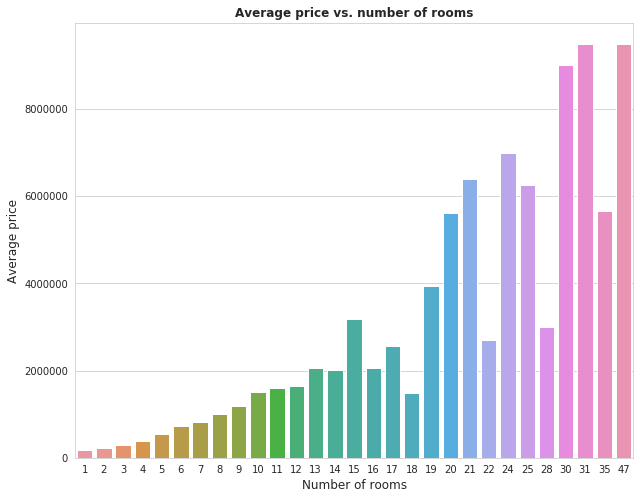

In [13]:
fig = plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(y=df['Prezzo_EUR'], x=df['Num_tot_locali'], ci=False)
plt.xlabel("Number of rooms", size=12)
plt.ylabel("Average price", size=12)
plt.title('Average price vs. number of rooms', weight='bold')
plt.show()

There isn't much information on this graph but we know that the number of rooms is highly correlated to the square meters of the home.

#### Price and number of bathrooms

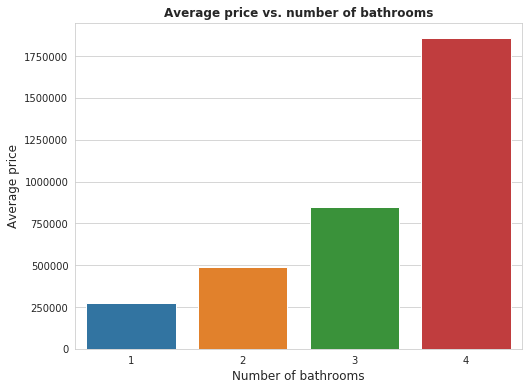

In [14]:
fig = plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(y=df['Prezzo_EUR'], x=df['Num_bagni'], ci=False)
plt.xlabel("Number of bathrooms", size=12)
plt.ylabel("Average price", size=12)
plt.title('Average price vs. number of bathrooms', weight='bold')
plt.show()

#### Price and district

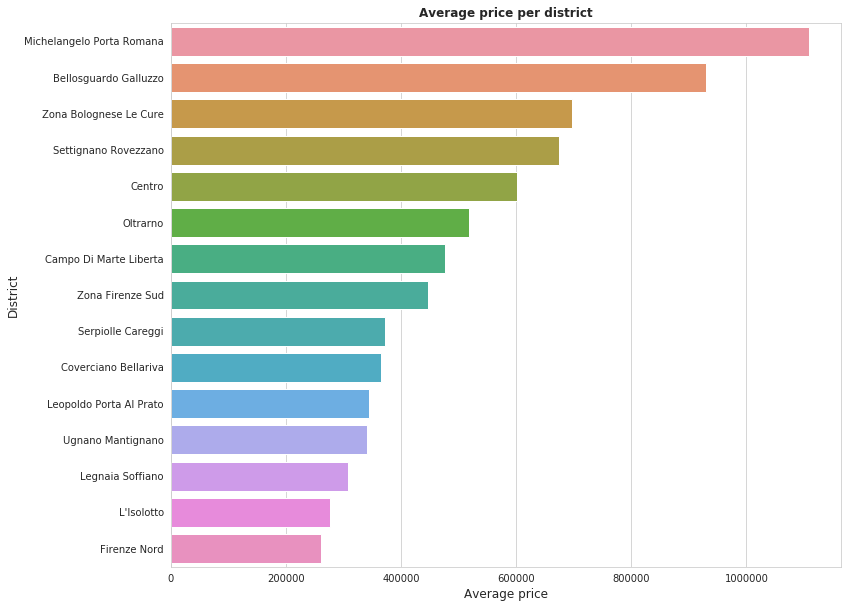

In [15]:
gb_ordered = df.groupby(['Zona']).agg({'Prezzo_EUR': 'mean'}).sort_values('Prezzo_EUR', ascending=False)

fig = plt.figure(figsize=(12, 10))
sns.barplot(gb_ordered['Prezzo_EUR'], y=gb_ordered.index, ci=None)
plt.xlabel("Average price", size=12)
plt.ylabel("District", size=12)
plt.title('Average price per district', weight='bold')
plt.show()

This graph illustrates the average price for a home for each of the districts in Firenze. The following graph however will give us a better understanding of what districts of Firenze tend to be more expensive

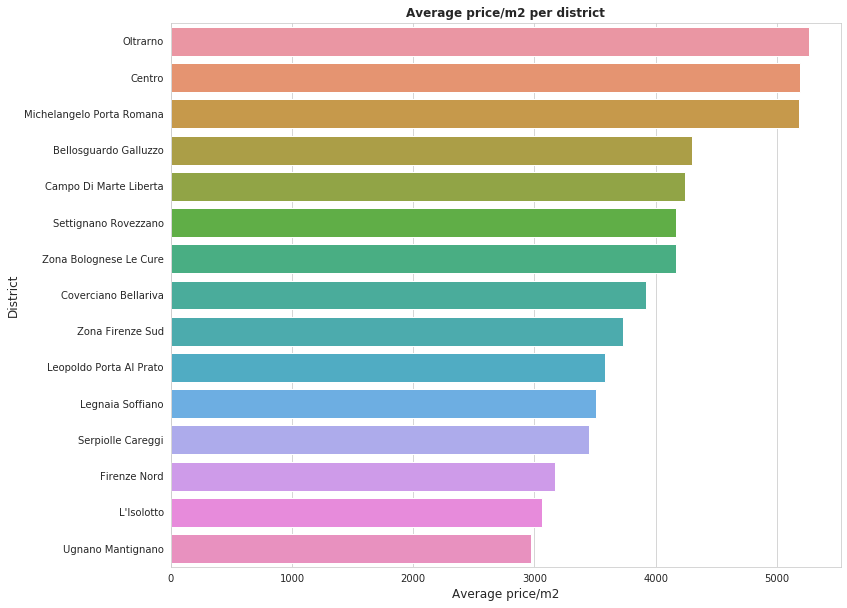

In [16]:
gb_ordered = df.groupby('Zona').agg({'Prezzo_per_m2': 'mean'}).sort_values('Prezzo_per_m2', ascending=False)

fig = plt.figure(figsize=(12, 10))
sns.barplot(gb_ordered['Prezzo_per_m2'], y=gb_ordered.index, ci=None)
plt.xlabel("Average price/m2", size=12)
plt.ylabel("District", size=12)
plt.title('Average price/m2 per district', weight='bold')
plt.show()

Dividing the price by the square meters gives us a better idea of what districts in Firenze cost more because we can exclude one of the most influencial features on price (square meters). As expected, houses in the city historic center (oltrarno, centro and Michelangelo/Porta Romana) are the most expensive per square meter.

#### Price and heating

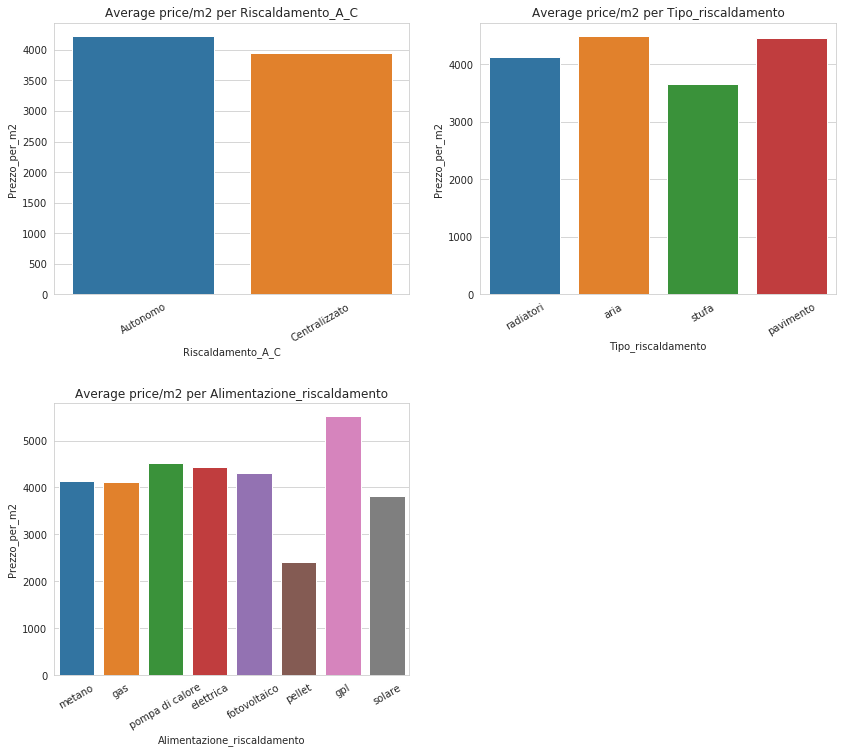

In [17]:
heating_cols = ['Riscaldamento_A_C', 'Tipo_riscaldamento', 'Alimentazione_riscaldamento']

fig = plt.figure(figsize=(14, 12))
sns.set_style('whitegrid')
for i, heating in enumerate(heating_cols, 1):
    
    x_values = df[heating]
    y_values = df['Prezzo_per_m2']

    plt.subplot(2, 2, i)
    sns.barplot(x=x_values, y=y_values, ci=None)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    plt.title('Average price/m2 per ' + str(heating))
    plt.xticks(rotation=30)

Heating does not seem to influence price that much.

#### Price and parking

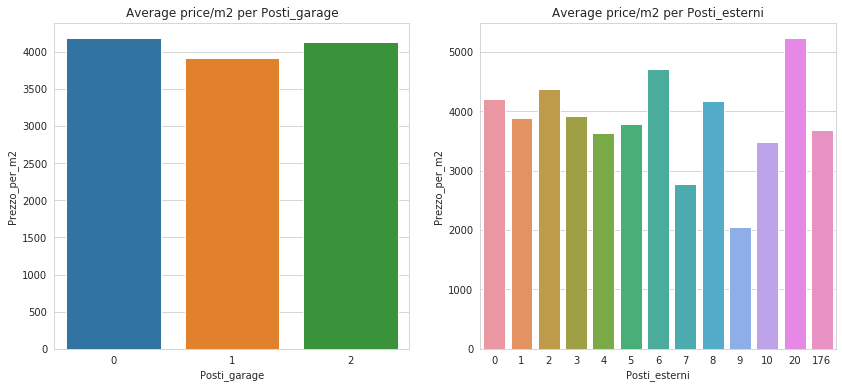

In [18]:
parking_cols = ['Posti_garage', 'Posti_esterni']

fig = plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
for i, parking in enumerate(parking_cols, 1):
    
    x_values = df[parking]
    y_values = df['Prezzo_per_m2']

    plt.subplot(1, 2, i)
    sns.barplot(x=x_values, y=y_values, ci=None)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    plt.title('Average price/m2 per ' + str(parking))

Again here there does not seem to be an apparent relationship between average price/m2 and parking.

#### Price and energy class

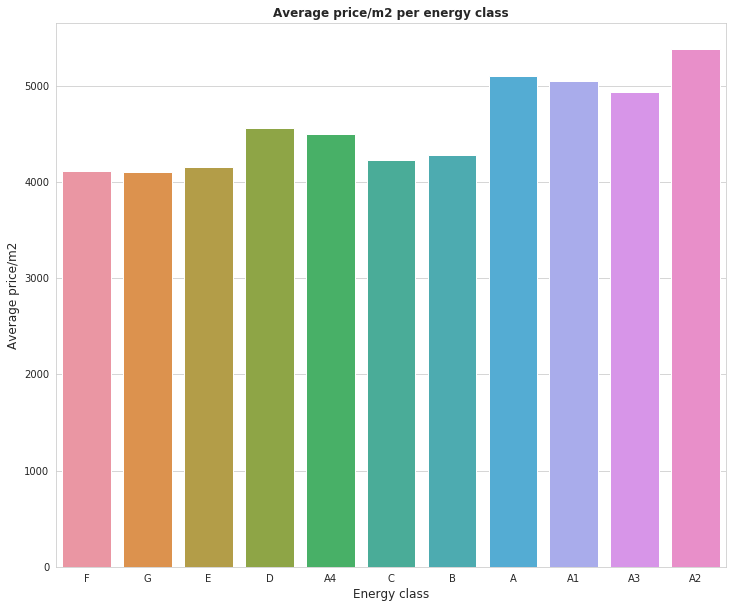

In [19]:
fig = plt.figure(figsize=(12, 10))
sns.barplot(x=df['Classe_energetica'], y=df['Prezzo_per_m2'], ci=None)
plt.xlabel("Energy class", size=12)
plt.ylabel("Average price/m2", size=12)
plt.title('Average price/m2 per energy class', weight='bold')
plt.show()

The average price per square meter seems to increase with the energy class (except for energy class A4) which is an interesting find.

In [20]:
df['Classe_energetica'].value_counts()

G     6751
F      785
E      331
A      201
B      176
D      160
C      125
A4     115
A1      34
A2      23
A3      13
Name: Classe_energetica, dtype: int64

In [21]:
df.corr()

,Prezzo_EUR,Superficie_m2,Prezzo_per_m2,Ascensore,Accesso_disabili,Posti_garage,Posti_esterni,Num_bagni,Num_tot_locali,Anno_costruzione,Fibra ottica,VideoCitofono,Porta blindata,Impianto tv singolo,Parzialmente Arredato,Infissi esterni in vetro / legno,Esposizione doppia,Balcone,Impianto tv centralizzato,Infissi esterni in doppio vetro / PVC,Esposizione esterna,Terrazza,Cancello elettrico,Cantina,Giardino privato,Caminetto,Portiere intera giornata,Infissi esterni in doppio vetro / legno,Armadio a muro,Impianto di allarme,Mansarda,Infissi esterni in doppio vetro / metallo,Solo Cucina Arredata,Esposizione interna,Infissi esterni in vetro / PVC,Giardino comune,Taverna,Impianto tv con parabola satellitare,Arredato,Infissi esterni in triplo vetro / PVC,Infissi esterni in triplo vetro / legno,Infissi esterni in vetro / metallo,Portiere mezza giornata,Cablato,Idromassaggio,Reception,Piscina,Infissi esterni in triplo vetro / metallo
Prezzo_EUR,1.00,0.71,0.29,-0.01,0.02,0.19,0.09,0.51,0.58,-0.19,-0.00,0.09,-0.02,-0.00,0.07,-0.01,-0.00,0.01,-0.09,-0.08,0.01,0.14,0.15,0.12,0.20,0.24,0.03,0.04,0.08,0.19,0.15,-0.02,-0.02,-0.06,-0.04,-0.01,0.21,0.11,0.02,-0.01,0.01,-0.02,0.01,-0.00,0.21,0.01,0.24,0.01
Superficie_m2,0.71,1.00,-0.05,-0.03,0.04,0.21,0.10,0.42,0.55,-0.10,0.01,0.07,-0.01,0.02,0.04,0.04,0.04,0.05,-0.05,-0.07,-0.00,0.13,0.15,0.15,0.21,0.20,0.02,0.02,0.09,0.15,0.14,-0.01,-0.01,-0.05,-0.03,-0.00,0.23,0.06,-0.00,-0.01,0.00,-0.01,0.01,-0.00,0.14,0.00,0.27,0.00
Prezzo_per_m2,0.29,-0.05,1.00,0.02,-0.01,-0.04,-0.02,0.16,-0.02,-0.31,-0.00,0.08,0.02,-0.01,0.06,-0.13,-0.10,-0.18,-0.09,-0.02,0.06,-0.02,0.01,-0.10,-0.01,0.11,0.04,0.08,0.04,0.12,0.03,-0.04,-0.01,0.01,0.01,-0.06,0.01,0.09,0.14,0.02,0.02,-0.05,0.00,-0.01,0.13,0.00,0.03,0.00
Ascensore,-0.01,-0.03,0.02,1.00,0.20,0.09,0.00,-0.06,0.01,0.20,0.04,0.10,0.11,-0.10,-0.06,0.01,-0.01,0.25,0.17,0.04,0.04,0.14,0.07,0.11,-0.21,-0.14,0.12,-0.04,0.01,0.04,-0.08,0.03,-0.02,-0.01,0.02,0.10,-0.06,-0.01,-0.05,0.06,0.01,0.01,0.07,-0.00,-0.00,0.05,-0.03,0.00
Accesso_disabili,0.02,0.04,-0.01,0.20,1.00,0.09,0.04,0.01,0.01,0.09,0.24,0.22,0.20,0.08,0.03,-0.01,0.11,0.03,0.15,0.15,0.06,0.09,0.23,0.06,0.10,0.04,0.01,0.04,0.18,0.15,-0.00,0.06,0.01,0.09,0.13,0.07,0.02,0.06,0.02,0.11,0.08,0.02,0.05,-0.01,0.04,-0.02,0.06,0.02
Posti_garage,0.19,0.21,-0.04,0.09,0.09,1.00,0.06,0.25,0.32,0.08,0.07,0.13,0.08,0.06,0.04,0.06,0.08,0.12,0.02,-0.04,0.02,0.19,0.26,0.24,0.20,0.13,0.07,0.05,0.07,0.18,0.11,0.01,-0.01,-0.03,-0.04,0.08,0.22,0.00,-0.02,0.00,0.04,-0.01,0.03,-0.01,0.11,0.02,0.09,0.06
Posti_esterni,0.09,0.10,-0.02,0.00,0.04,0.06,1.00,0.10,0.11,-0.01,0.05,0.06,0.05,0.02,0.00,0.03,0.02,0.02,0.02,-0.01,0.01,0.06,0.16,0.07,0.10,0.07,0.01,0.02,0.04,0.12,0.03,0.01,-0.00,0.03,-0.01,0.09,0.07,0.02,0.02,0.01,0.01,-0.00,0.00,-0.00,0.10,0.01,0.09,0.01
Num_bagni,0.51,0.42,0.16,-0.06,0.01,0.25,0.10,1.00,0.65,-0.21,0.03,0.14,0.03,0.03,0.04,-0.02,0.04,-0.00,-0.10,-0.11,-0.02,0.18,0.20,0.19,0.25,0.27,0.06,0.08,0.11,0.23,0.22,-0.01,-0.02,-0.07,-0.04,0.01,0.25,0.11,-0.00,-0.01,0.04,-0.02,0.01,-0.00,0.21,0.02,0.17,0.02
Num_tot_locali,0.58,0.55,-0.02,0.01,0.01,0.32,0.11,0.65,1.00,-0.11,0.02,0.07,-0.04,0.04,0.05,0.10,0.10,0.14,-0.07,-0.14,-0.05,0.21,0.18,0.29,0.26,0.28,0.06,0.04,0.11,0.20,0.19,-0.03,-0.02,-0.10,-0.06,0.02,0.23,0.07,-0.06,-0.02,0.00,-0.02,0.04,0.00,0.18,0.01,0.23,0.01
Anno_costruzione,-0.19,-0.10,-0.31,0.20,0.09,0.08,-0.01,-0.21,-0.11,1.00,0.02,-0.01,0.02,-0.04,-0.11,0.01,0.00,0.16,0.09,0.12,0.01,0.08,-0.00,0.04,0.01,-0.26,0.02,-0.13,-0.07,-0.10,-0.08,0.04,0.00,0.01,0.03,-0.01,-0.04,-0.08,-0.08,0.05,0.01,0.04,0.02,-0.01,-0.09,0.01,-0.08,0.00


In [22]:
df.columns

Index(['Tipologia', 'Zona', 'Stato', 'Prezzo_EUR', 'Superficie_m2',
       'Prezzo_per_m2', 'Tipo_proprietà', 'Riscaldamento_A_C',
       'Tipo_riscaldamento', 'Alimentazione_riscaldamento',
       'Classe_energetica', 'Data_annuncio', 'Ascensore', 'Accesso_disabili',
       'Piano', 'Posti_garage', 'Posti_esterni', 'Num_bagni',
       'Superficie_bins', 'Num_tot_locali', 'Anno_costruzione', 'Fibra ottica',
       'VideoCitofono', 'Porta blindata', 'Impianto tv singolo',
       'Parzialmente Arredato', 'Infissi esterni in vetro / legno',
       'Esposizione doppia', 'Balcone', 'Impianto tv centralizzato',
       'Infissi esterni in doppio vetro / PVC', 'Esposizione esterna',
       'Terrazza', 'Cancello elettrico', 'Cantina', 'Giardino privato',
       'Caminetto', 'Portiere intera giornata',
       'Infissi esterni in doppio vetro / legno', 'Armadio a muro',
       'Impianto di allarme', 'Mansarda',
       'Infissi esterni in doppio vetro / metallo', 'Solo Cucina Arredata',
       'Es

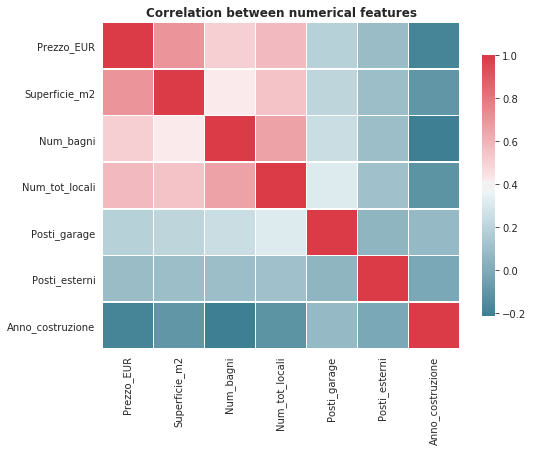

In [23]:
corr_cols = ['Prezzo_EUR', 'Superficie_m2', 'Num_bagni', 'Num_tot_locali', 'Posti_garage', 'Posti_esterni',
             'Anno_costruzione']

fig = plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[corr_cols].corr(), linewidth=.5, cbar_kws={'shrink': .8}, cmap=cmap)
plt.title('Correlation between numerical features', weight='bold')
plt.show()

Granted that the heatmap above only shows **linear** correlation, it is pretty clear that square meters and number of rooms/bathrooms correlate positively with price. The three features however are also correlated between each other which could cause problems when fitting a linear model to the data.